In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.stats import beta
import ot

In [3]:
# Cam's phase template numbers: 
#The following is an array of beta distribution parameters. These correspond to the different Phase Templates.

beta_parameters = np.zeros(shape=(9,2))
#beta_parameters[0,:] = [1,1] # need this even though we draw nothing
beta_parameters[0,:] = [1,1] #uniform
beta_parameters[1,:] = [4.9411, 4.9410] #middle half
beta_parameters[2,:] = [2.3383, 7.0152] # first half
beta_parameters[3,:] = [7.0098, 2.3360] # last half 
beta_parameters[4,:] = [2.9748, 22.7435] # first fifth
beta_parameters[5,:] = [16.6826, 38.7860] # second fifth
beta_parameters[6,:] = [33.38976, 33.38971] # middle fifth
beta_parameters[7,:] = [38.8160, 16.6951] # fourth fifth
beta_parameters[8,:] = [16.8478, 1.9845] #last fifth


In [ ]:
# make my own distributions so that maybe they look more reasonable when we are comparing them (bc i dont like his)

# Define the number of distributions
num_distributions = 50

# Define the desired range for means 
mean_min = 0.1
mean_max = 0.3

# Define the standard deviation
std_dev = 0.1 / 3  # Half of the range for 90% probability within 0.1 on either side
#std_dev = 0.25/3

# Initialize lists to store alpha and beta values
alpha_values = []
beta_values = []

# Generate 50 evenly spaced mean values
mean_values = np.linspace(mean_min, mean_max, num_distributions)

# Calculate alpha and beta for each mean value to approximate a Gaussian shape
for mean in mean_values:
    # Calculate the shape parameters using the mean and standard deviation
    alpha = ((1 - mean) / std_dev**2 - 1 / mean) * mean**2
    betav = alpha * (1 / mean - 1)

    alpha_values.append(alpha)
    beta_values.append(betav)
beta_parameters = np.array([alpha_values, beta_values]).T

In [4]:
beta_parameters.shape

(9, 2)

In [5]:
beta_parameters

array([[ 1.     ,  1.     ],
       [ 4.9411 ,  4.941  ],
       [ 2.3383 ,  7.0152 ],
       [ 7.0098 ,  2.336  ],
       [ 2.9748 , 22.7435 ],
       [16.6826 , 38.786  ],
       [33.38976, 33.38971],
       [38.816  , 16.6951 ],
       [16.8478 ,  1.9845 ]])

Pair 1: 0.0
Pair 2: 0.0008116140372856948
Pair 3: 0.0009683342797104423
Pair 4: 0.0009681544542328381
Pair 5: 0.001454777692641401
Pair 6: 0.0014260684258371272
Pair 7: 0.0014259742352981334
Pair 8: 0.001426247810973169
Pair 9: 0.0014271637726886717


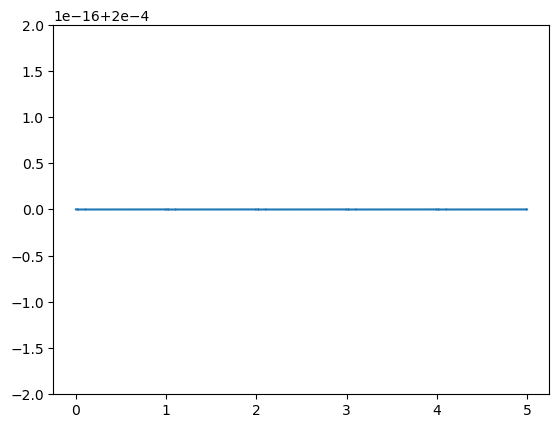

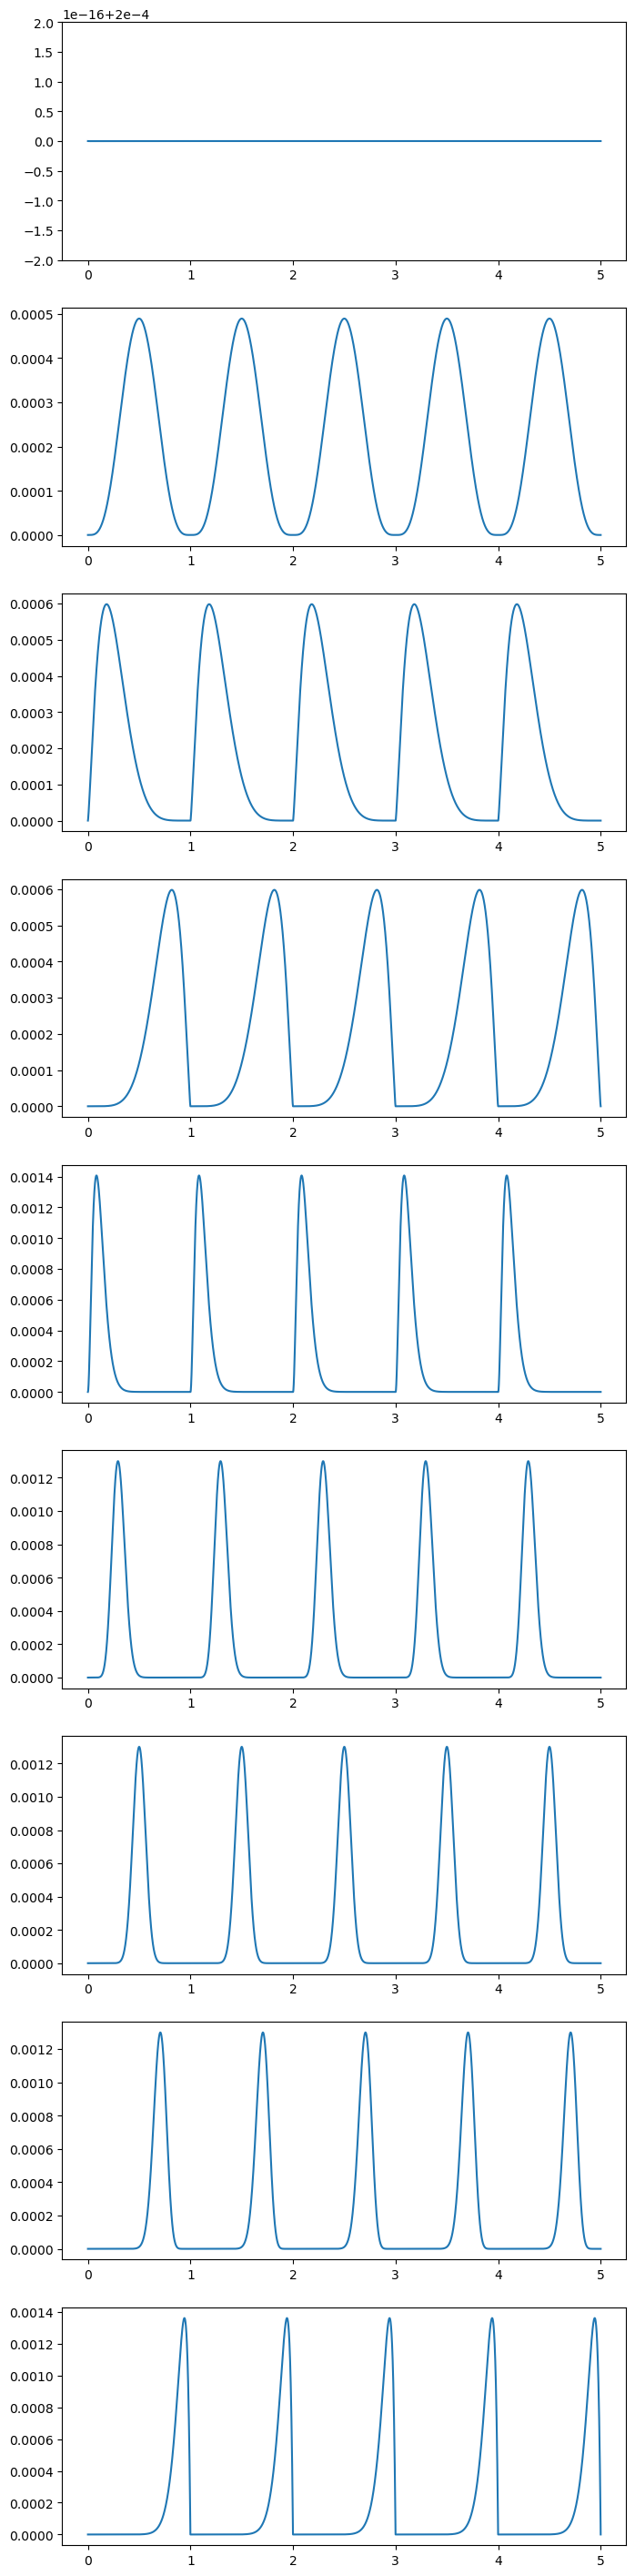

In [6]:
# Define the fixed beta distribution parameters
fixed_parameters = [beta_parameters[0][0], beta_parameters[0][1]]
results = []
# Define the x values for the PDF plot
x = np.linspace(0, 1, 1000)
x_tile = np.linspace(0,5,5000)

# Define the PDF for the fixed beta distribution
fixed_pdf = np.tile(beta.pdf(x, fixed_parameters[0], fixed_parameters[1]),5)
#fixed_pdf = beta.pdf(x, fixed_parameters[0], fixed_parameters[1])
fixed_pdf1 = fixed_pdf/sum(fixed_pdf)
# Plot the fixed beta distribution
plt.plot(x_tile, fixed_pdf1, label="Fixed Beta Distribution")
ot_r = []

# Create subplots
fig, axes = plt.subplots(nrows=len(beta_parameters), ncols=1, figsize=(8, 4 * len(beta_parameters)))

# Iterate through each pair of parameters in the array and compare with the fixed distribution
for i, pair in enumerate(beta_parameters):
    pdf = np.tile(beta.pdf(x, pair[0], pair[1]), 5)
    pdf1 = pdf / sum(pdf)
    axes[i].plot(x_tile, pdf1, label=f"Pair {i + 1}")
    absolute_difference = np.abs(pdf1 - fixed_pdf1)
    d = ot.emd2_1d(x_tile, x_tile, pdf1, fixed_pdf1, metric='minkowski', p=1)
    result = np.trapz(absolute_difference, x_tile)
    results.append(result)
    ot_r.append(d)
    print(f"Pair {i + 1}: {result}")

# Show the subplots
plt.show()




In [7]:
len(ot_r)

9

[]

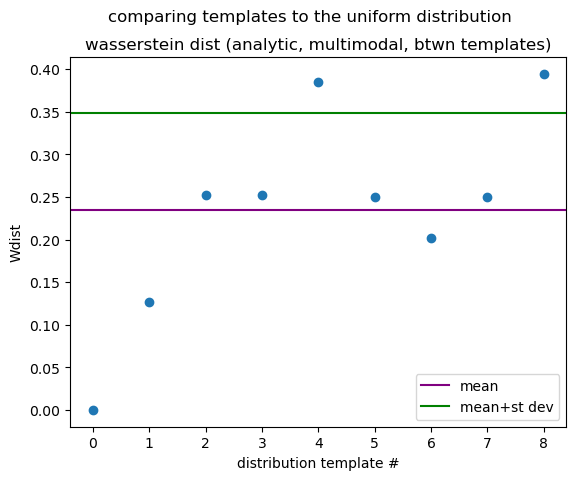

In [9]:
plt.scatter((range(9)),ot_r)
plt.title('wasserstein dist (analytic, multimodal, btwn templates)')
plt.suptitle('comparing templates to the uniform distribution')
plt.axhline(y=(np.mean(ot_r)),color='purple', label='mean')
plt.axhline(y=(np.mean(ot_r) + abs(np.std(ot_r))),color='green', label='mean+st dev')
#plt.axhline(y=0.5,color='red', label='random guessing')
plt.xlabel('distribution template #')
plt.ylabel('Wdist')
plt.legend(loc = 'lower right')
plt.plot()

In [41]:
# write a function to calculate the cost matrix: 
def cost_matrix(x,y):
    M = ot.dist(x.reshape(len(x),1), y.reshape(len(y),1))
    #
    M = -np.log(np.cos(np.clip(M,None,math.pi/2))**2)
    M /= M.max()
    return M

In [42]:
test = cost_matrix(pdf1_i, pdf1_j)

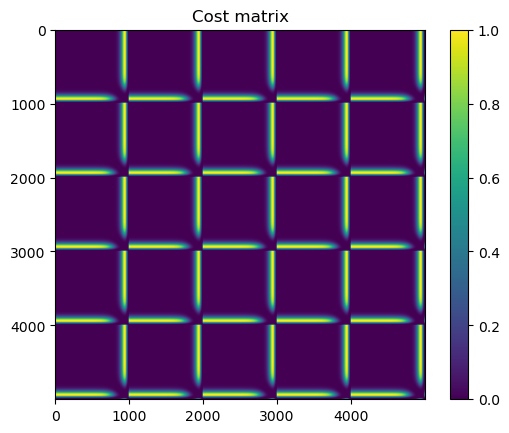

In [43]:
plt.imshow(test, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add a colorbar to the right of the plot
plt.title('Cost matrix')
plt.show()

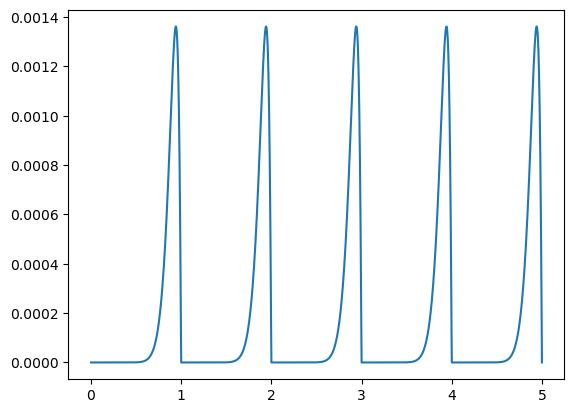

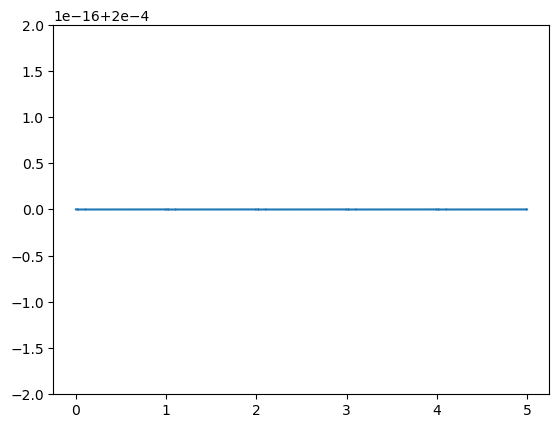

Pair 1 accurate result: 0.0014271637726886717
Pair 1 emd2_1d result: 0.39432625975800467
Pair 1 unbalSK result: 0.016159057199186973


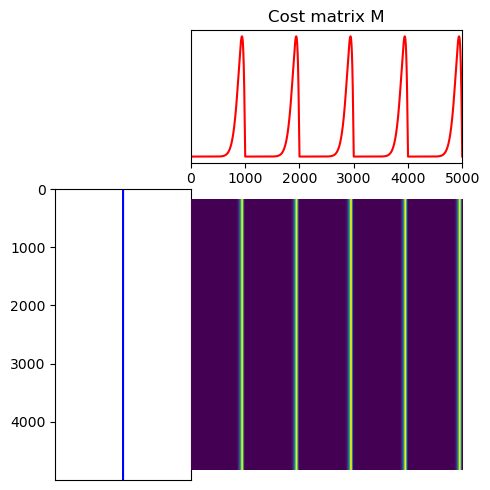

 pair 1 done.


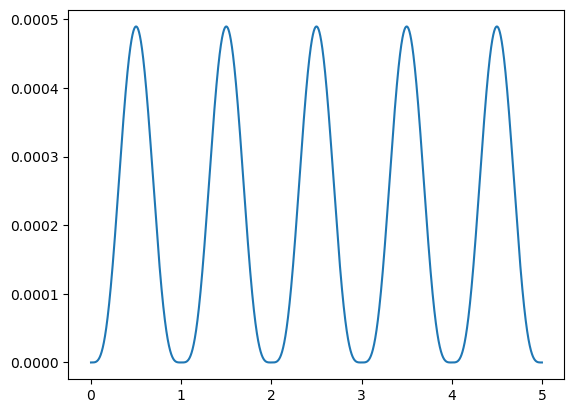

Pair 2 accurate result: 0.0018201405768668156
Pair 2 emd2_1d result: 0.3942988013146914
Pair 2 unbalSK result: 0.23472045674070366


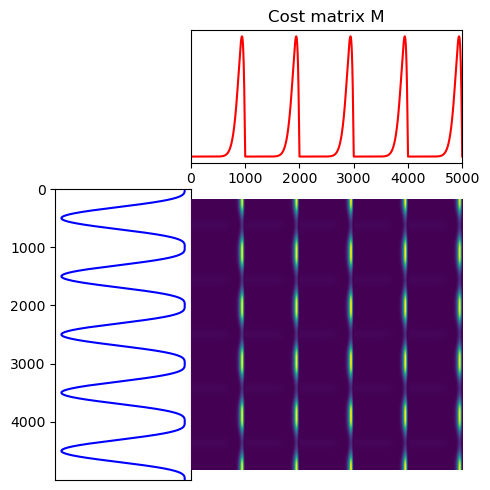

 pair 2 done.


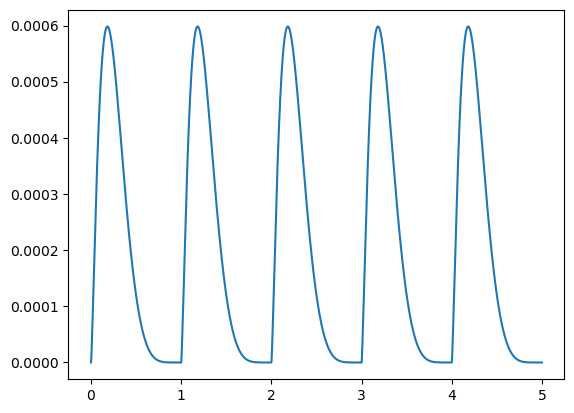

Pair 3 accurate result: 0.0019801108510378003
Pair 3 emd2_1d result: 0.6441117350617445
Pair 3 unbalSK result: 0.18616253480574868


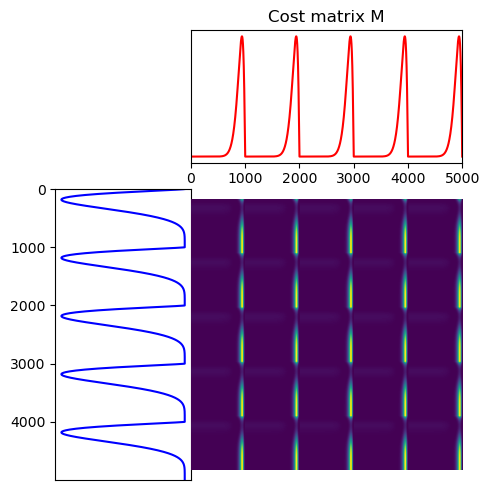

 pair 3 done.


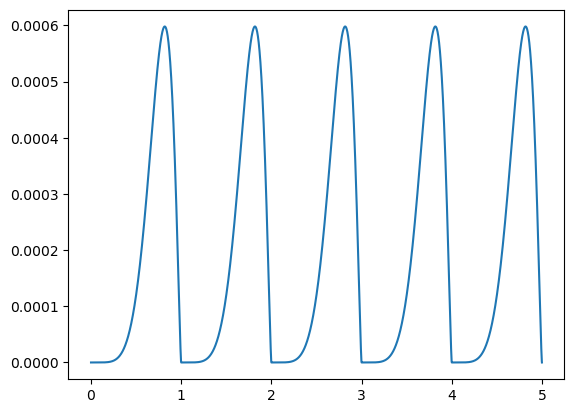

Pair 4 accurate result: 0.001036073200670029
Pair 4 emd2_1d result: 0.14445588083831315
Pair 4 unbalSK result: 0.18622515632724485


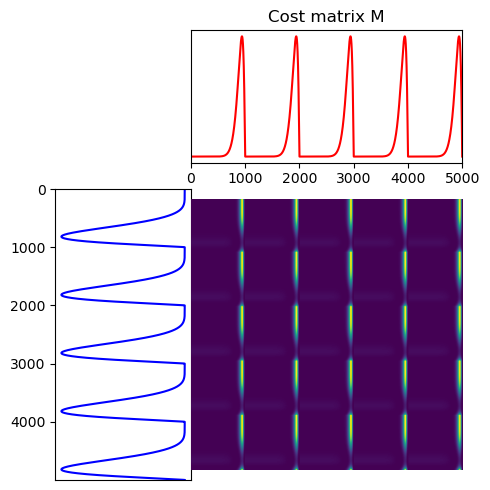

 pair 4 done.


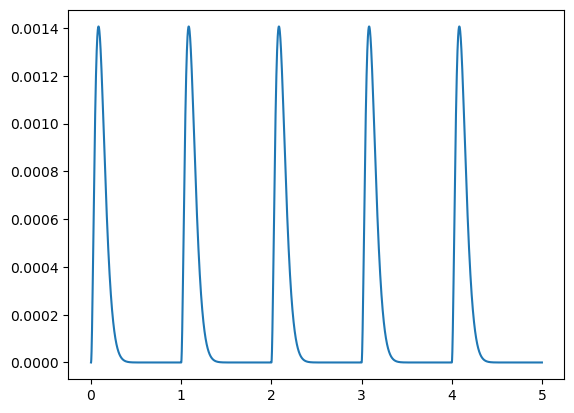

Pair 5 accurate result: 0.0020002714260415186
Pair 5 emd2_1d result: 0.7783277198808519
Pair 5 unbalSK result: 0.014801014337603538


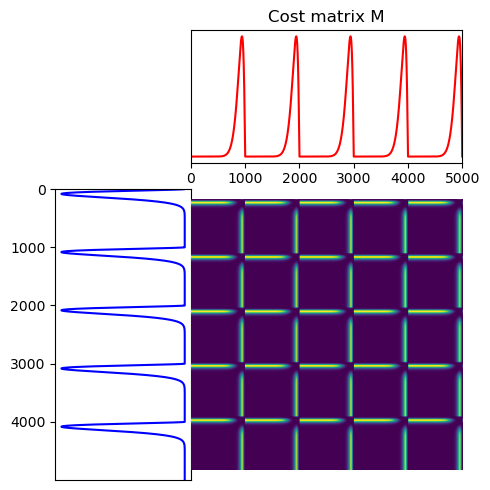

 pair 5 done.


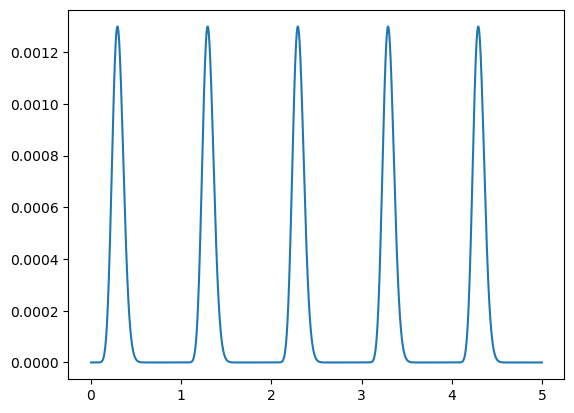

Pair 6 accurate result: 0.001999579346101917
Pair 6 emd2_1d result: 0.5933868853603229
Pair 6 unbalSK result: 0.014641364065037557


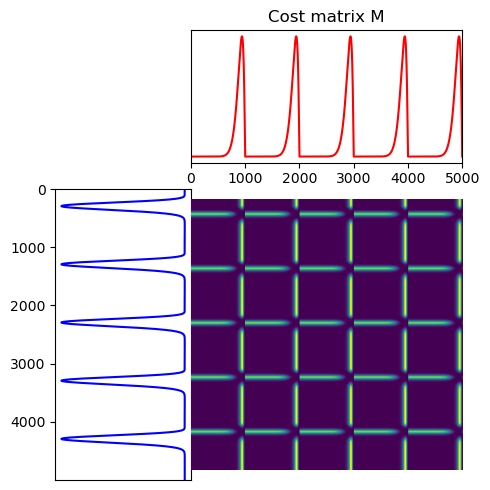

 pair 6 done.


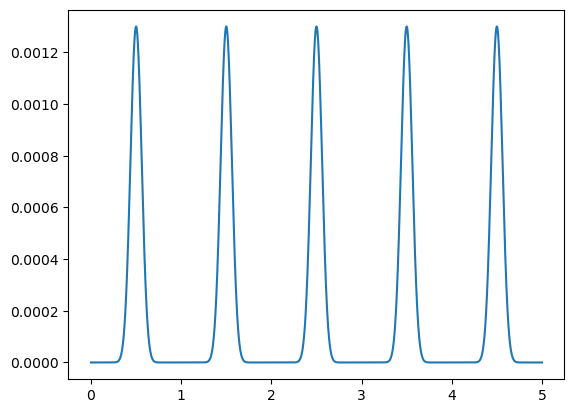

Pair 7 accurate result: 0.0019812613998645336
Pair 7 emd2_1d result: 0.39430348285247074
Pair 7 unbalSK result: 0.014618402992097436


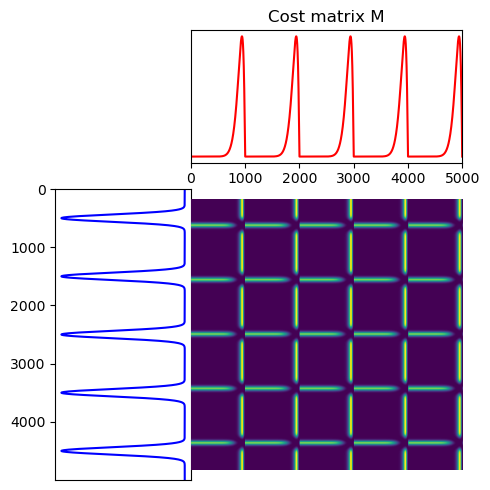

 pair 7 done.


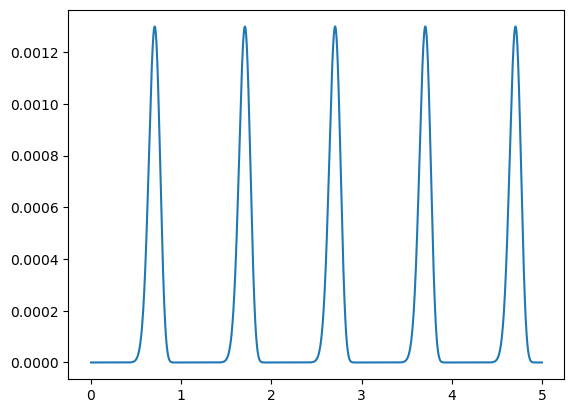

Pair 8 accurate result: 0.0017172094351262635
Pair 8 emd2_1d result: 0.1952157753513612
Pair 8 unbalSK result: 0.014632160985796085


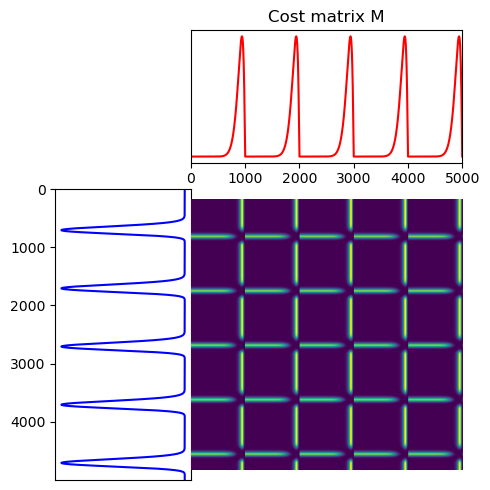

 pair 8 done.


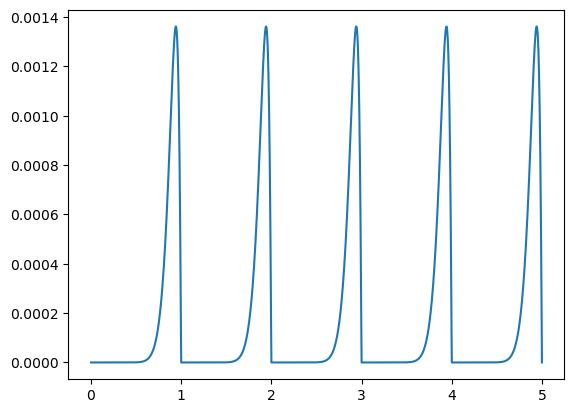

Pair 9 accurate result: 0.0
Pair 9 emd2_1d result: 0.0
Pair 9 unbalSK result: 0.014170844698925702


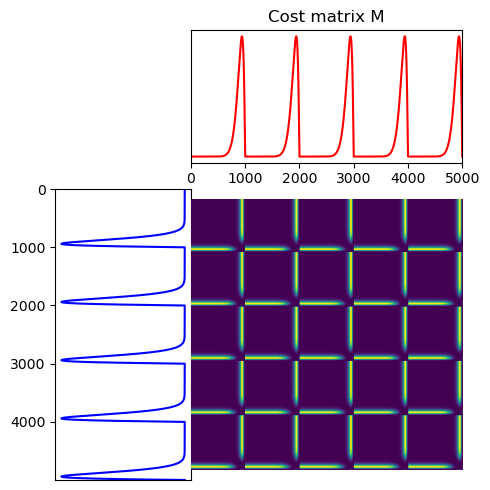

 pair 9 done.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import ot
import ot.plot

# Define the fixed beta distribution parameters
fixed_parameters = [beta_parameters[-1][0], beta_parameters[-1][1]]
results = []
# Define the x values for the PDF plot
x = np.linspace(0, 1, 1000)
x_tile = np.linspace(0,5,5000)


reg = 0.001
regm = 0.5
# Define the PDF for the fixed beta distribution
fixed_pdf = np.tile(beta.pdf(x, fixed_parameters[0], fixed_parameters[1]),5)
#fixed_pdf = beta.pdf(x, fixed_parameters[0], fixed_parameters[1])
fixed_pdf1 = fixed_pdf/sum(fixed_pdf)
# Plot the fixed beta distribution
plt.plot(x_tile, fixed_pdf1, label="Fixed Beta Distribution")
plt.show()
ot_r = []
uot_r = []

# Iterate through each pair of parameters in the array and compare with the fixed distribution
for i, pair in enumerate(beta_parameters):
    pdf = np.tile(beta.pdf(x, pair[0], pair[1]),5)
    #pdf = beta.pdf(x, pair[0], pair[1])
    pdf1 = pdf/sum(pdf)
    plt.plot(x_tile, pdf1, label=f"Pair {i + 1}")
    plt.show()
    absolute_difference = np.abs(pdf1 - fixed_pdf1)
    d = ot.emd2_1d(x_tile,x_tile,pdf1, fixed_pdf1, metric='minkowski', p=1) 

    result = np.trapz(absolute_difference, x_tile)
    results.append(result)
    ot_r.append(d)
    print(f"Pair {i + 1} accurate result: {result}")
    print(f"Pair {i + 1} emd2_1d result: {d}")
    
    # loss matrix
    M = cost_matrix(pdf1,fixed_pdf1)
    
    uot_d = math.sqrt(ot.unbalanced.sinkhorn_unbalanced2(pdf1, fixed_pdf1, M,reg, regm, verbose=True))
    uot_r.append(uot_d)
    print(f"Pair {i + 1} unbalSK result: {uot_d}")
    
    plt.figure(2, figsize=(5, 5))
    ot.plot.plot1D_mat(pdf1, fixed_pdf1, M, 'Cost matrix M')
    plt.show()
    print(f" pair {i+1} done.")


1d doesnt let me move mass on left past mass on right 
wfr is a 2d thing so i can swap mass around 


[]

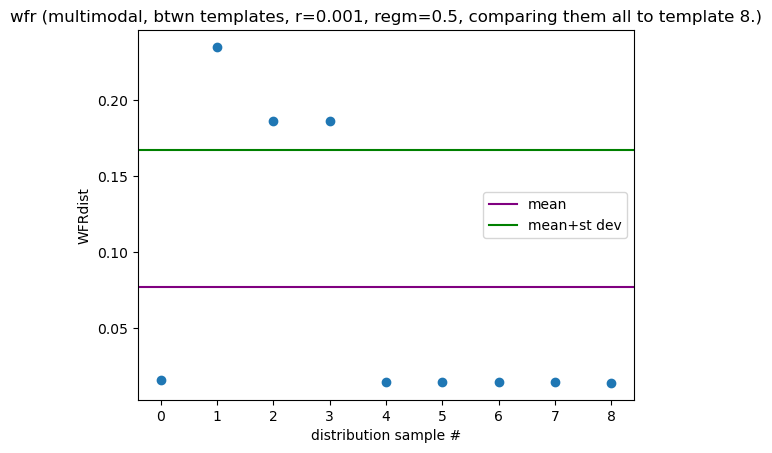

In [28]:
plt.scatter((range(9)),uot_r)
plt.title('wfr (multimodal, btwn templates, r=0.001, regm=0.5, comparing them all to template 8.)')
plt.axhline(y=(np.mean(uot_r)),color='purple', label='mean')
plt.axhline(y=(np.mean(uot_r) + abs(np.std(uot_r))),color='green', label='mean+st dev')
#plt.axhline(y=0.5,color='red', label='random guessing')
plt.xlabel('distribution sample #')
plt.ylabel('WFRdist')
plt.legend(loc = 'center right')
plt.plot()

as two distributions get close together the entropy term is having a very hard time (seee small increase) when r=0.001

appears that output is not scaling with delta??


as dist get closer, the entropy term was dominating with first two i sent e. which is not what we want actually - we want distnace coming from entropy term to be as low as possible (or, entropy term was fucking up). need to get eps close to zero. dont go smaller than 1/1000.




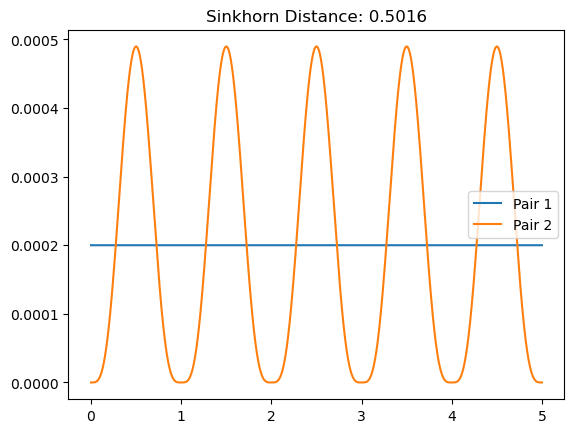

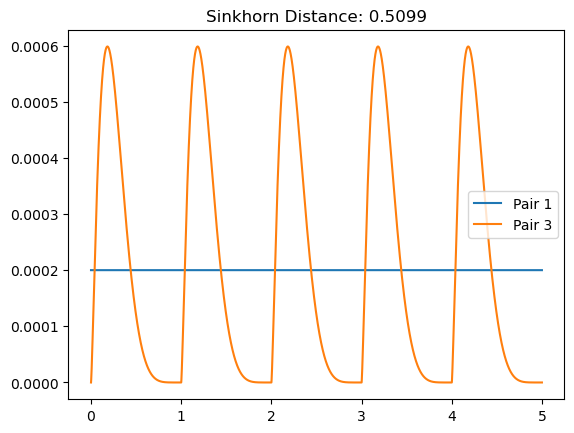

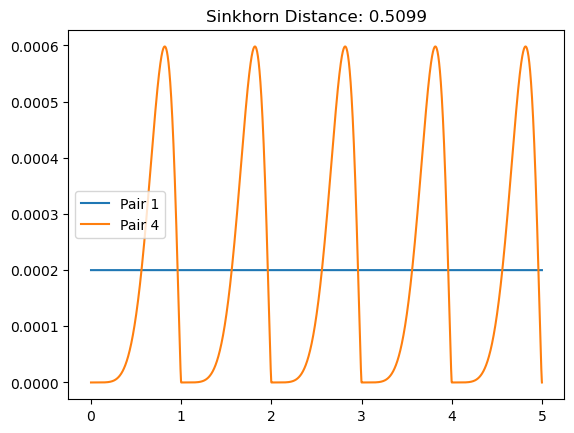

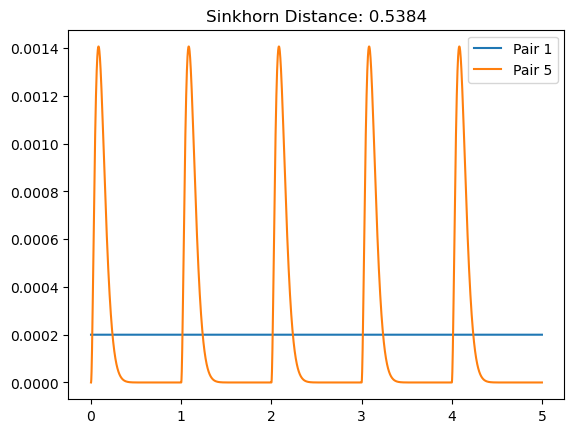

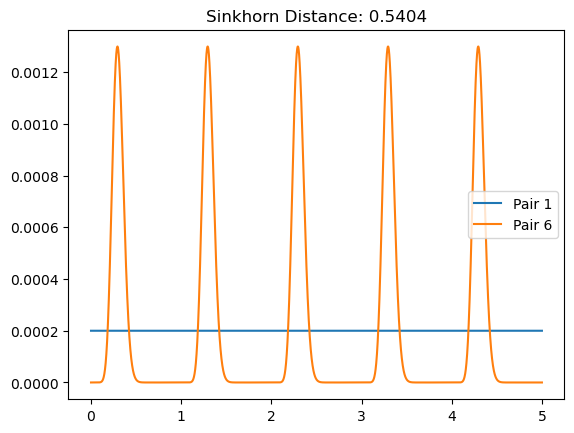

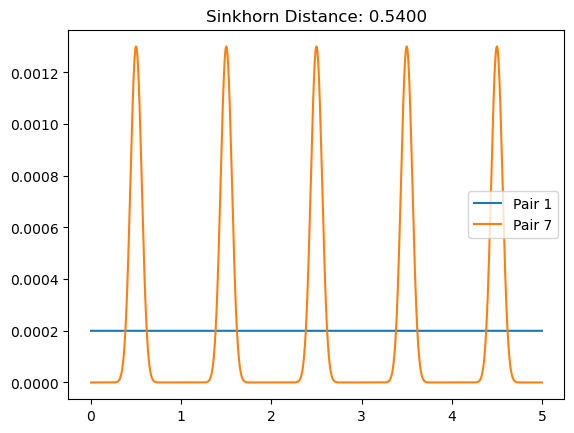

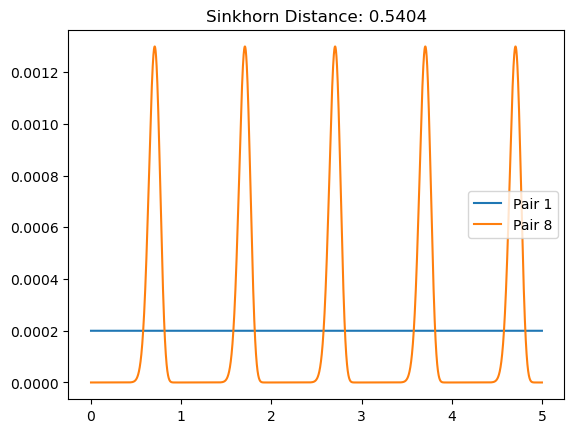

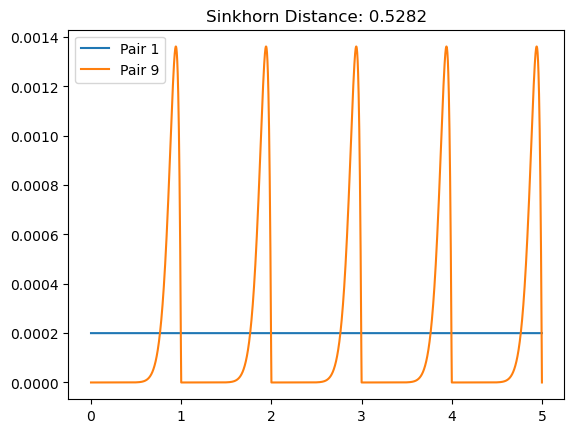

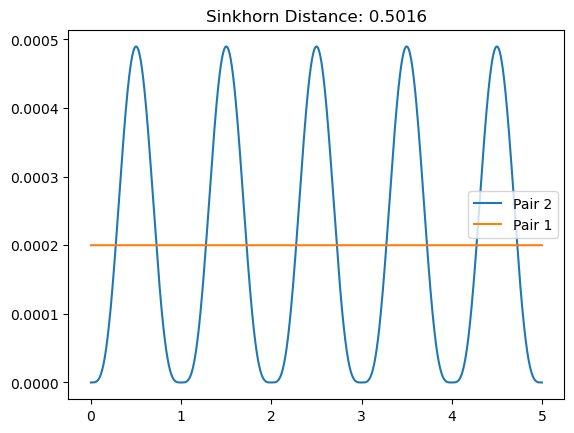

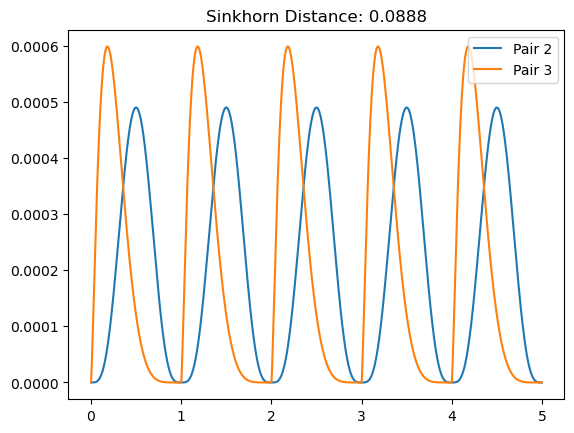

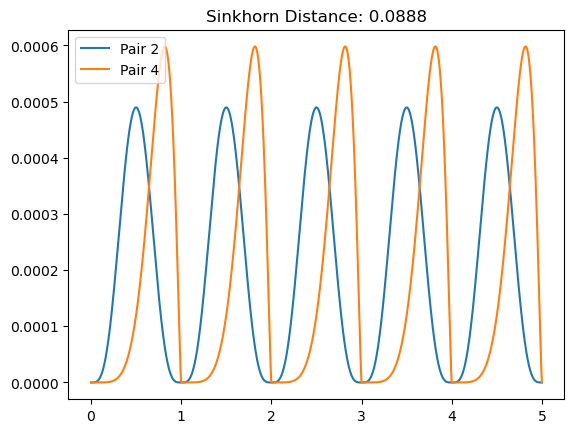

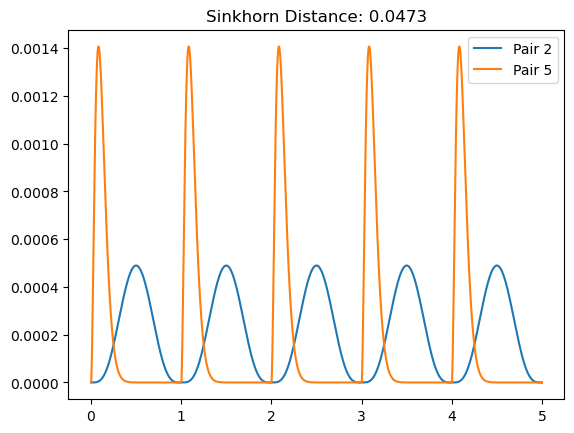

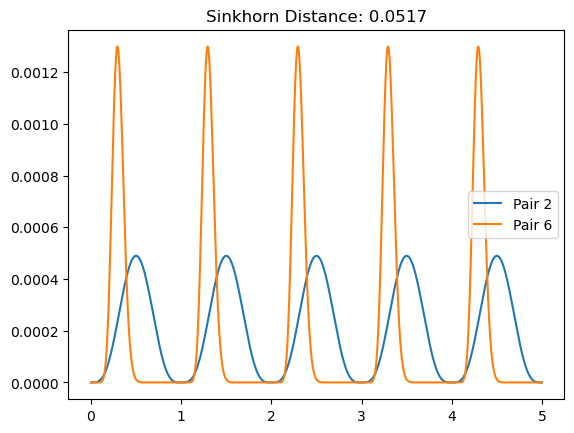

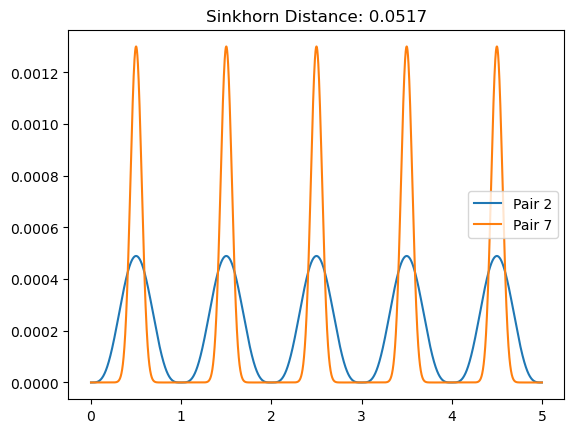

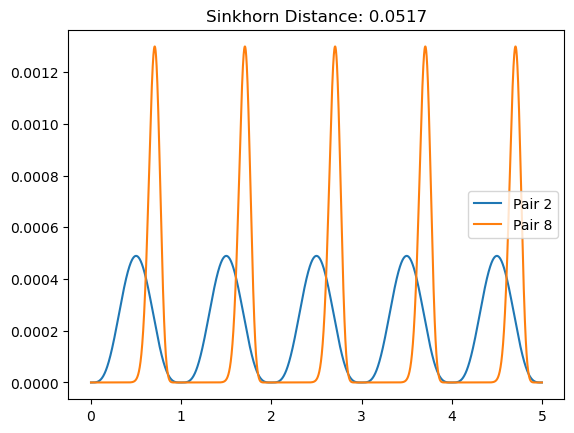

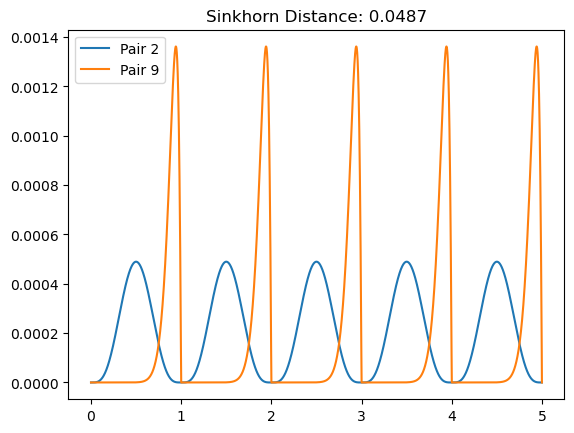

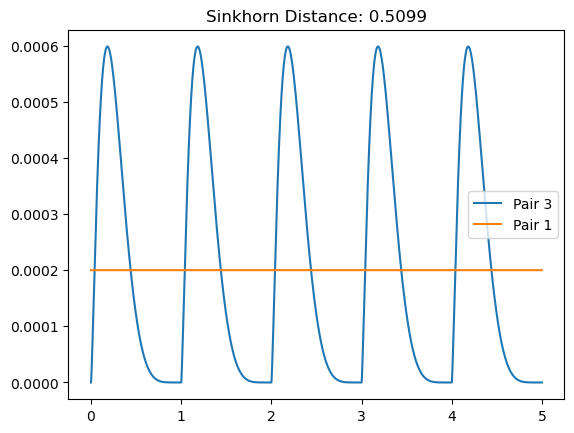

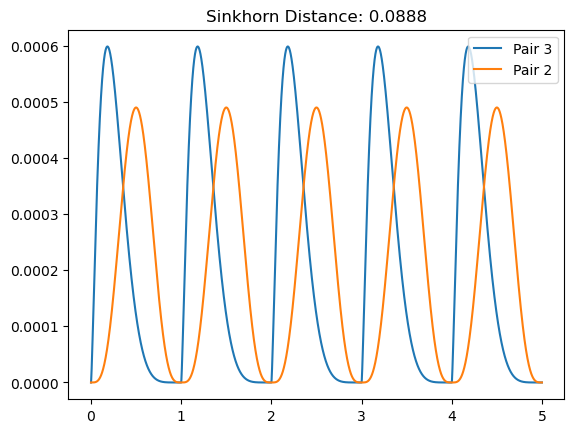

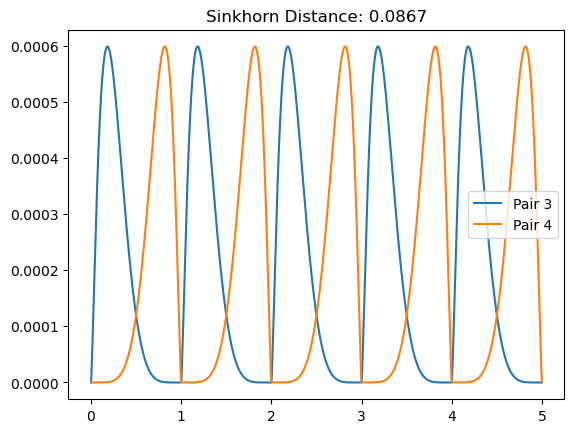

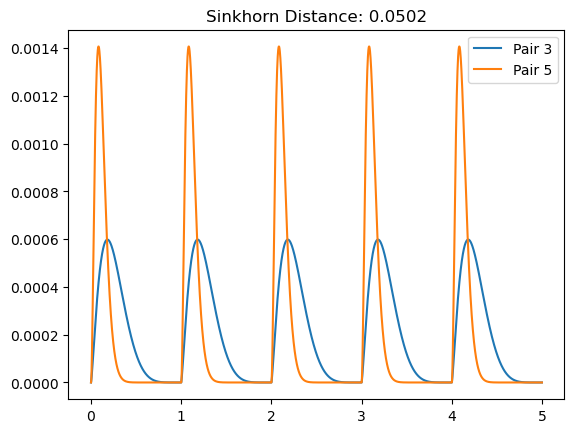

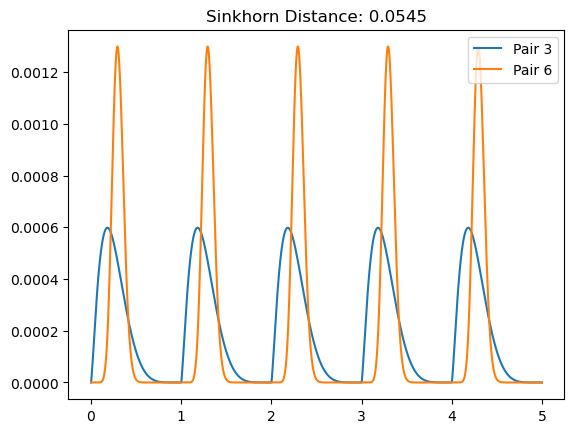

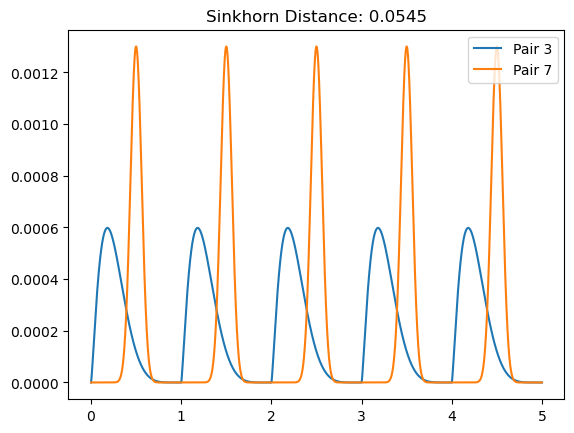

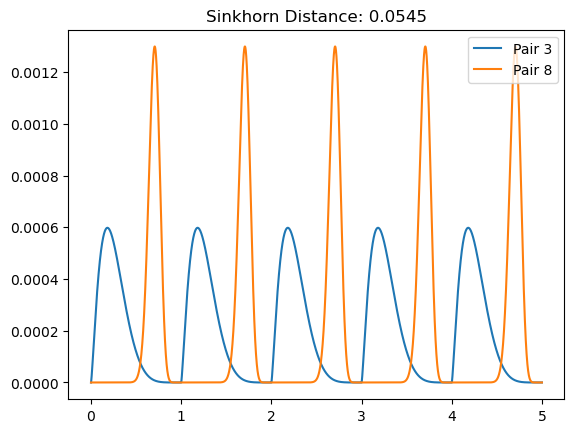

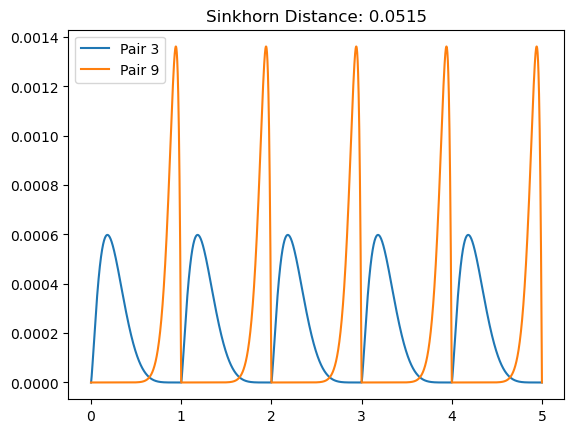

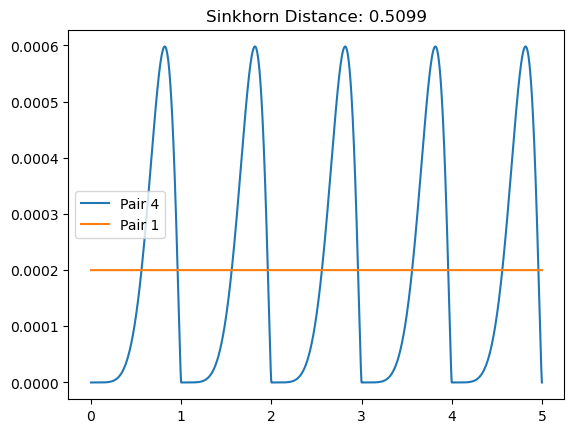

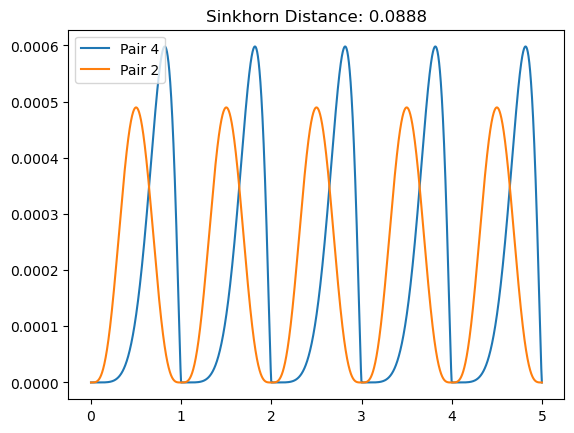

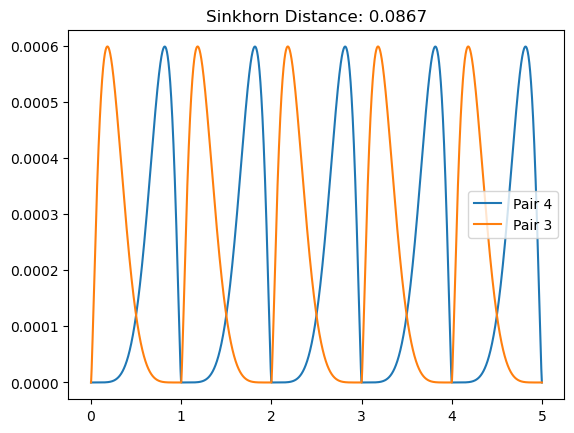

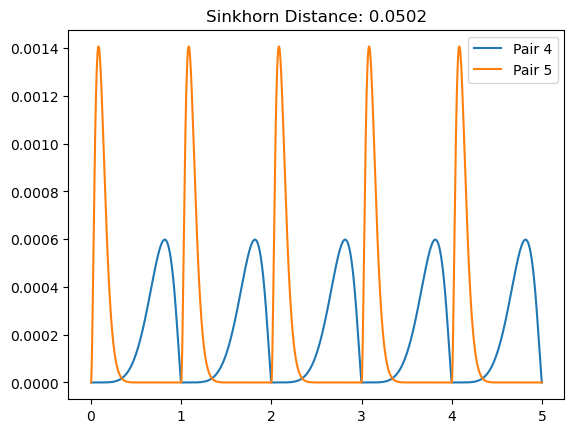

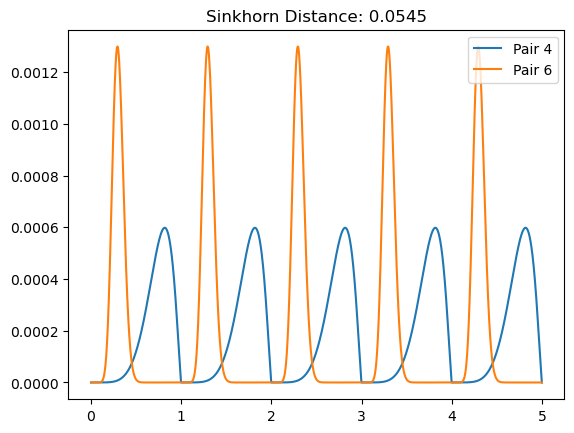

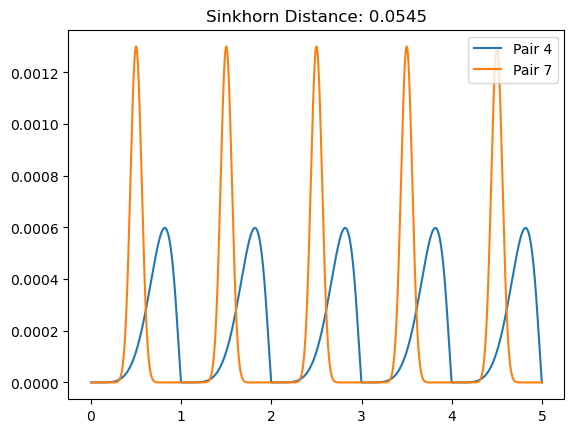

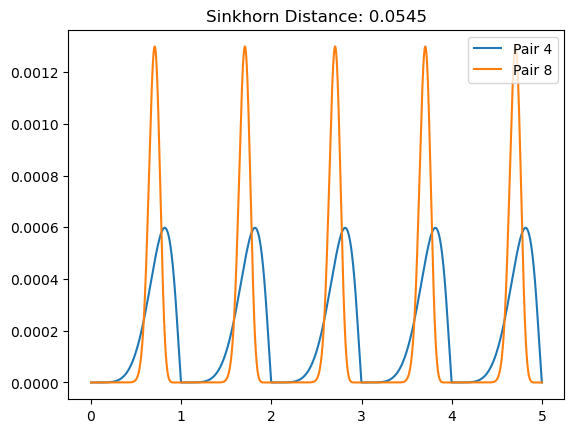

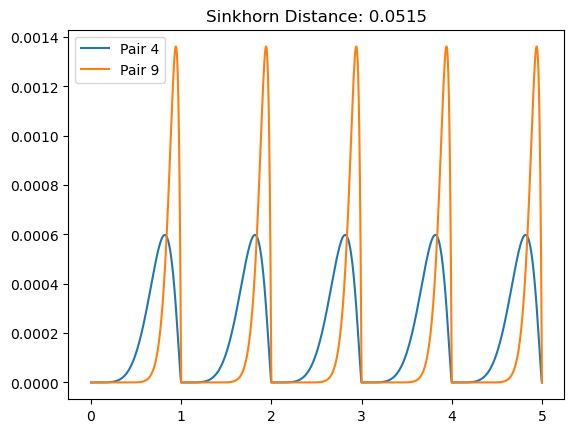

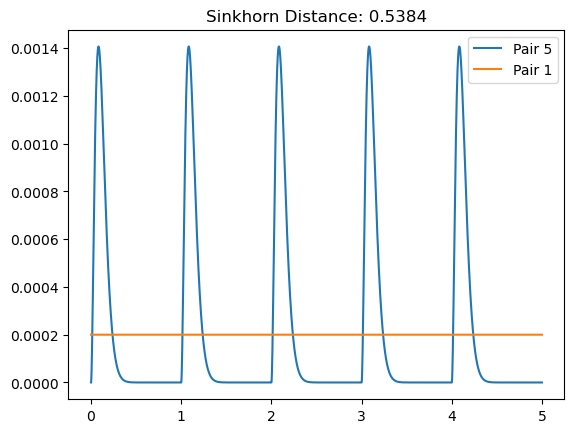

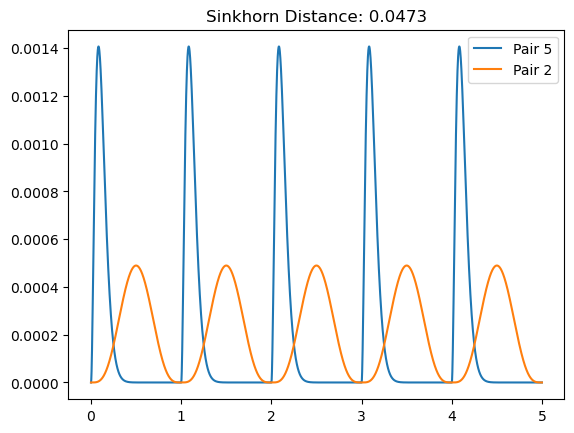

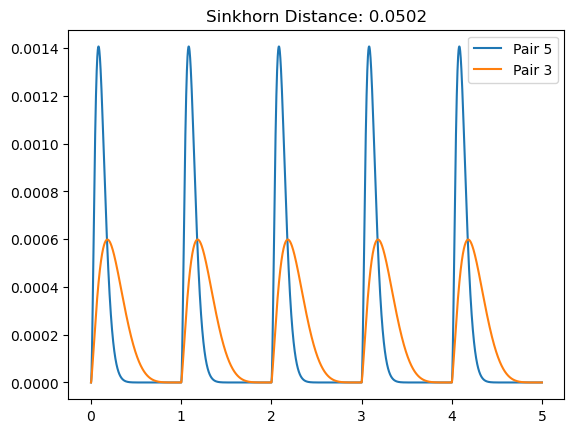

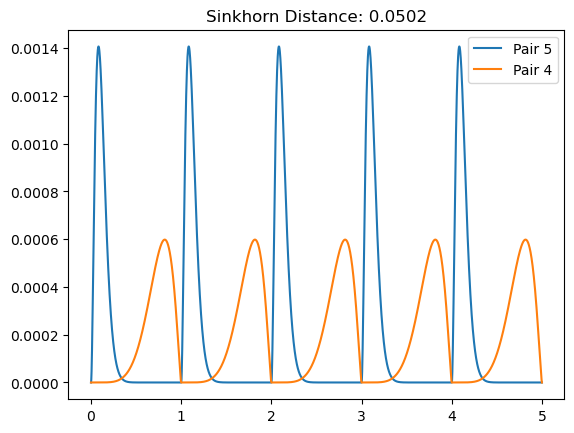

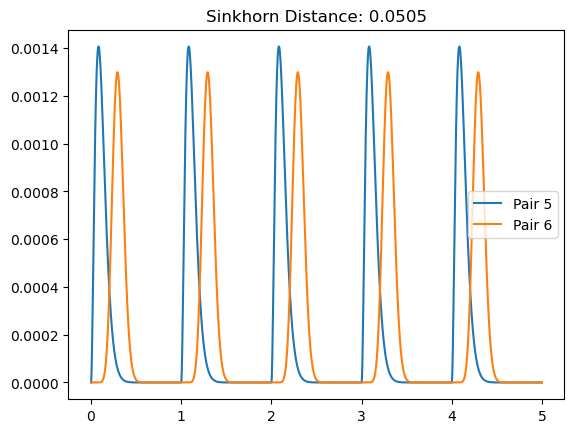

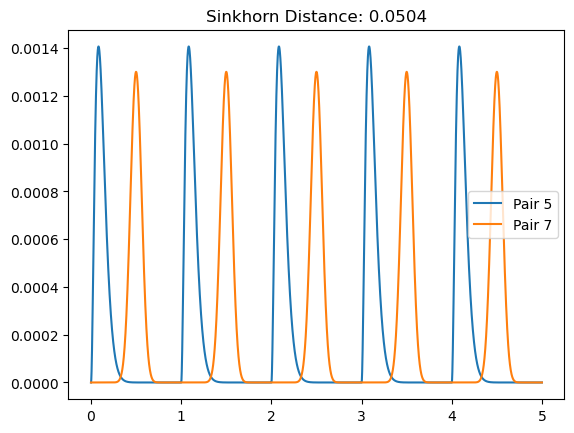

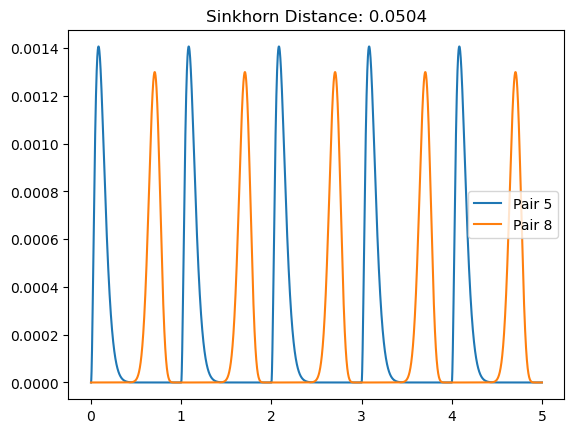

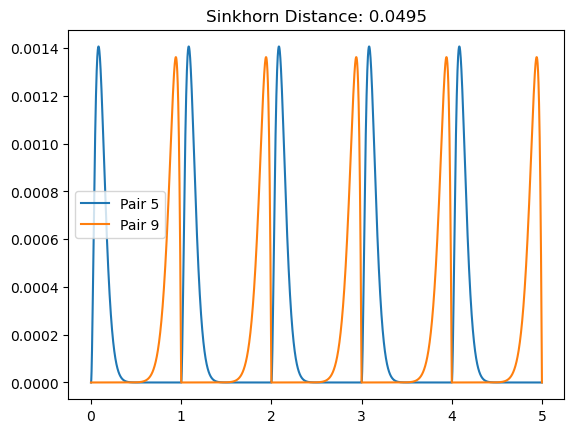

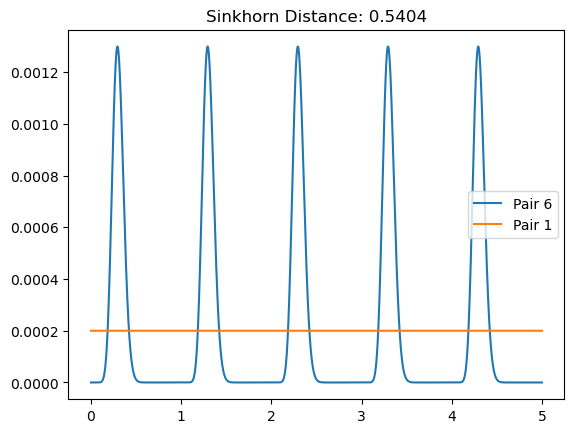

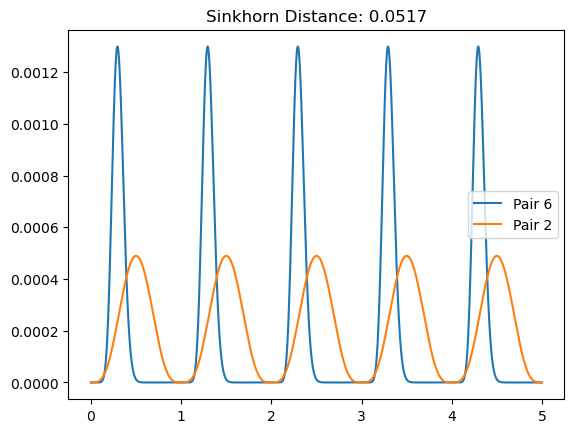

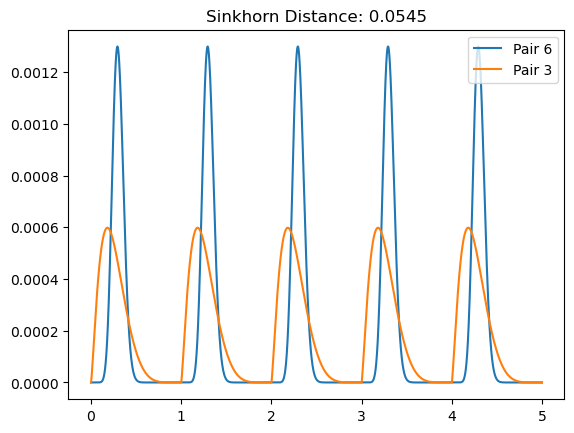

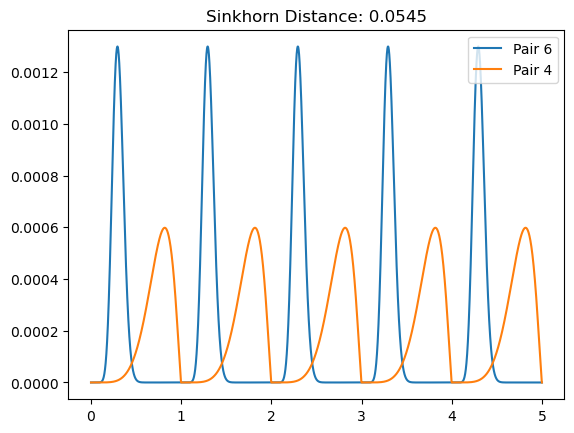

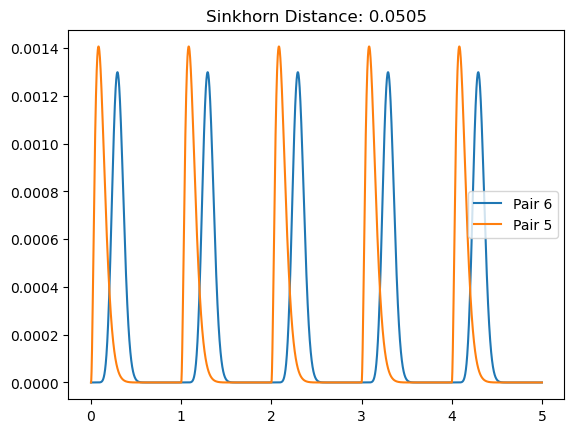

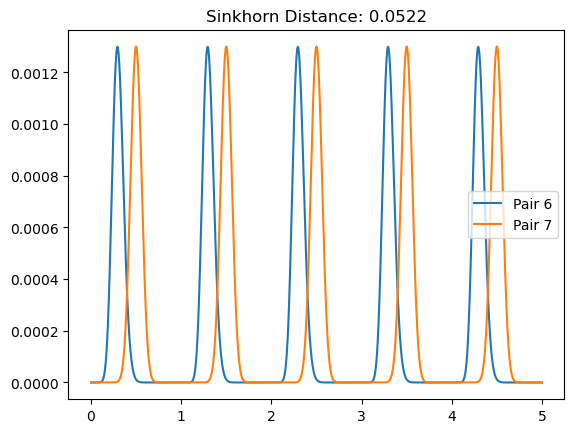

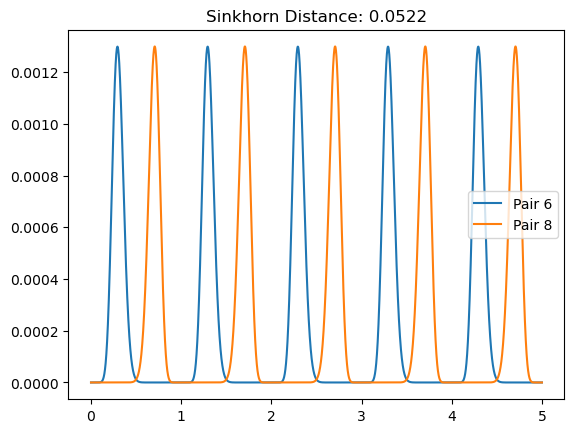

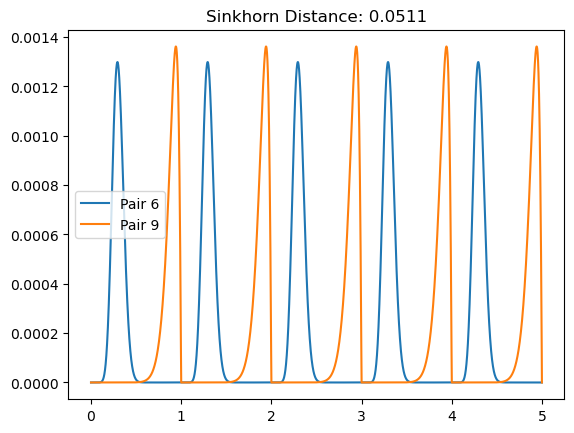

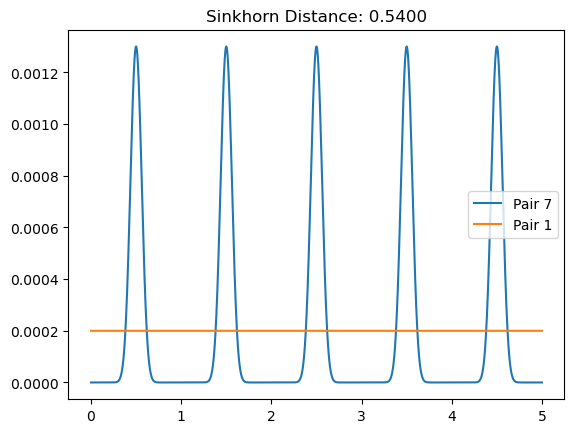

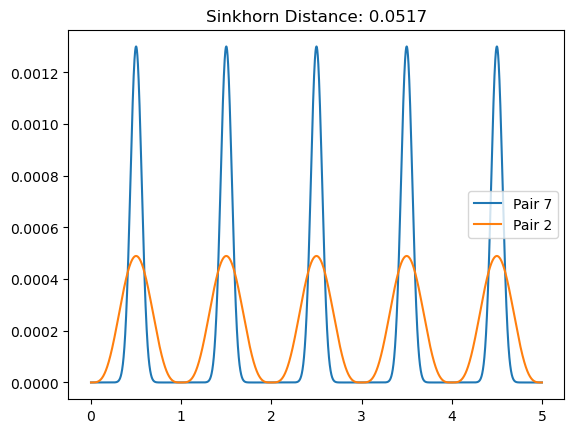

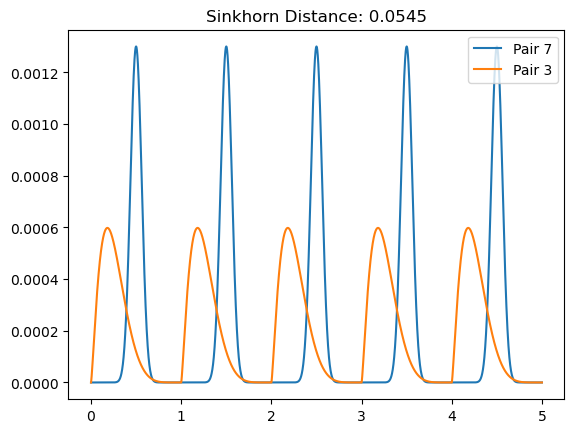

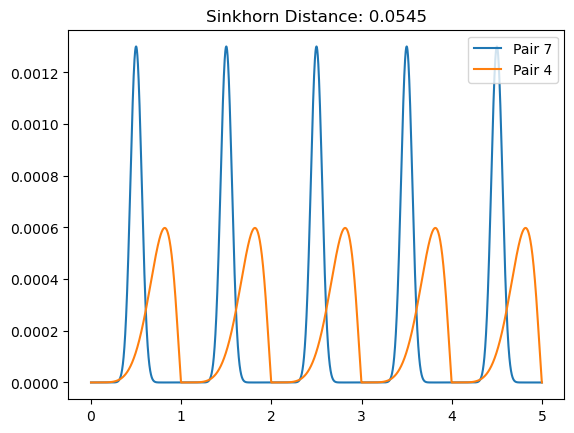

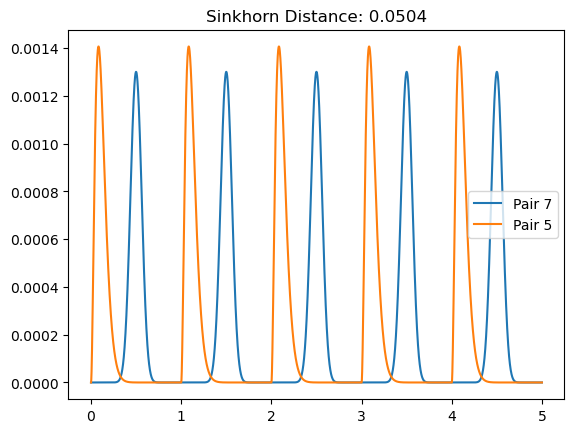

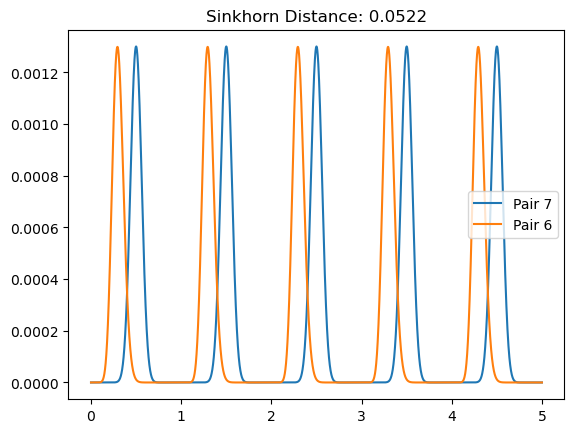

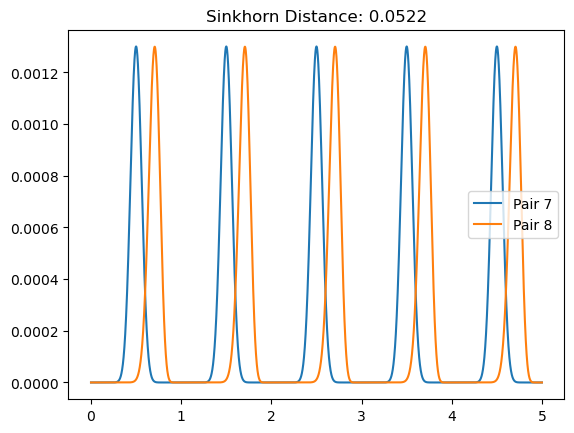

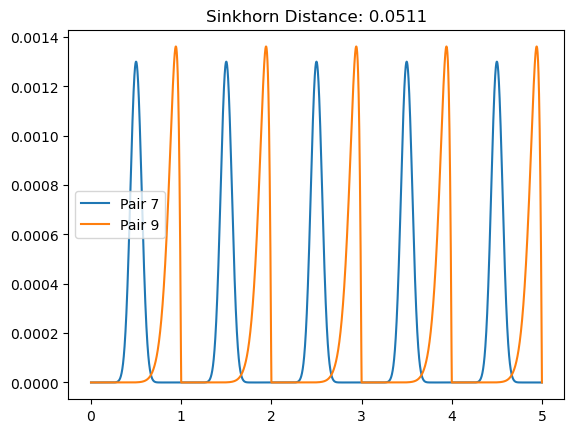

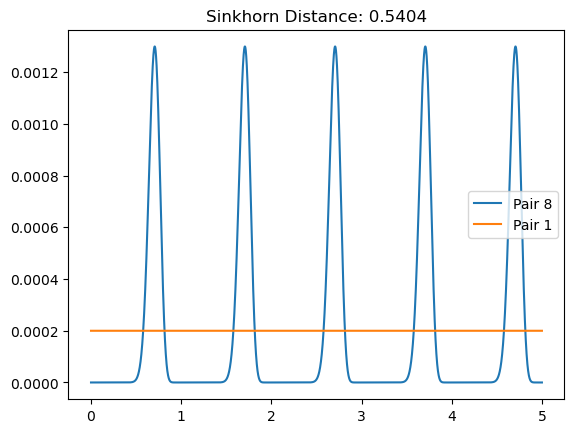

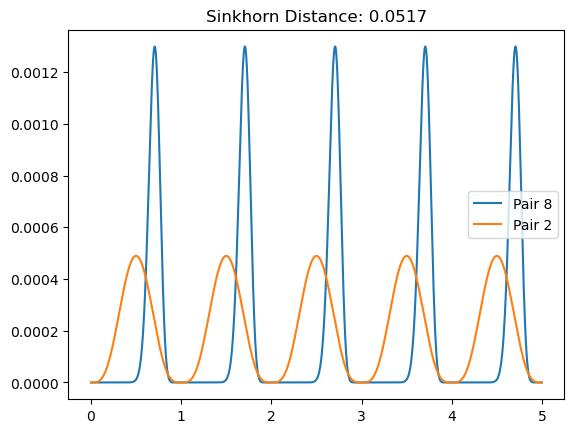

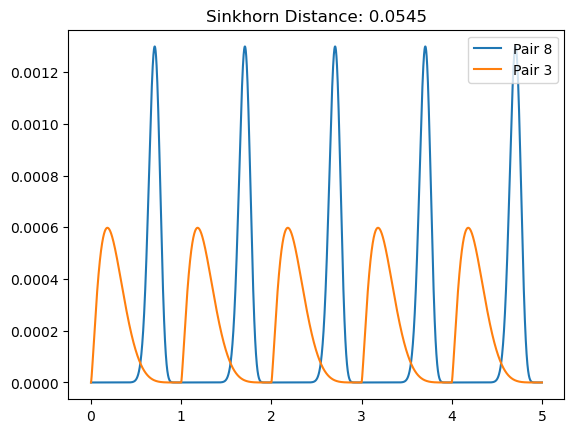

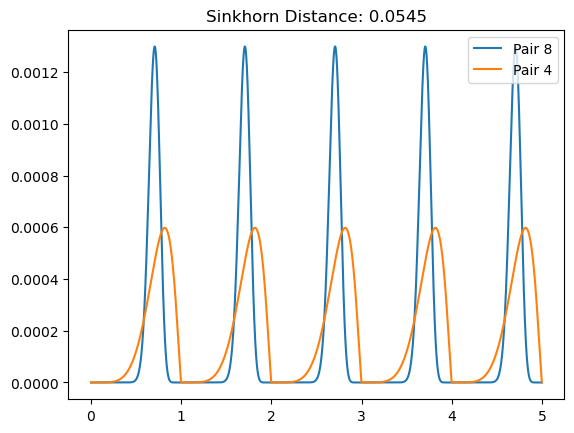

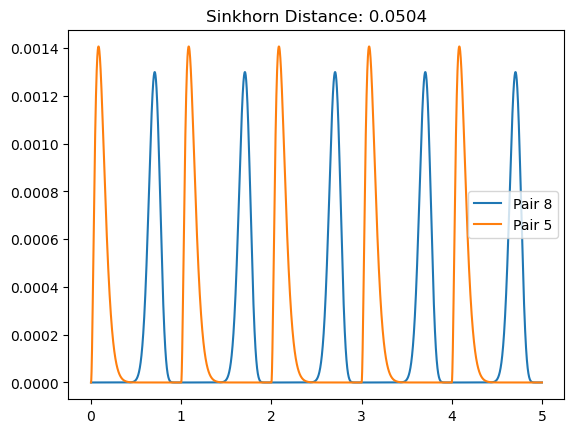

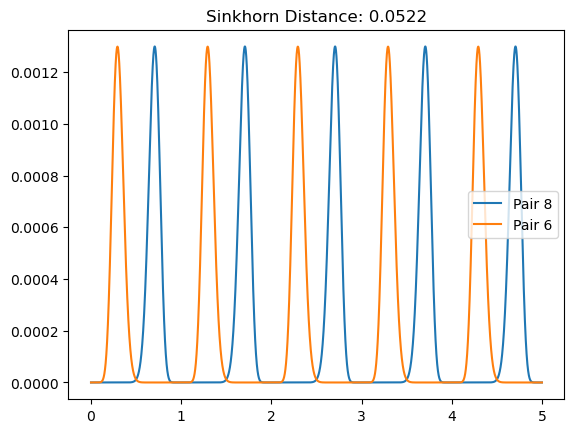

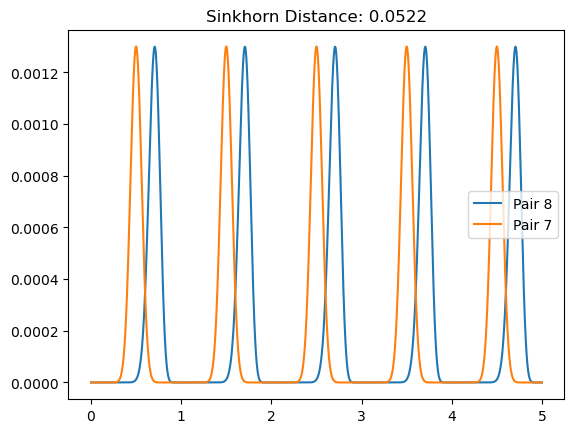

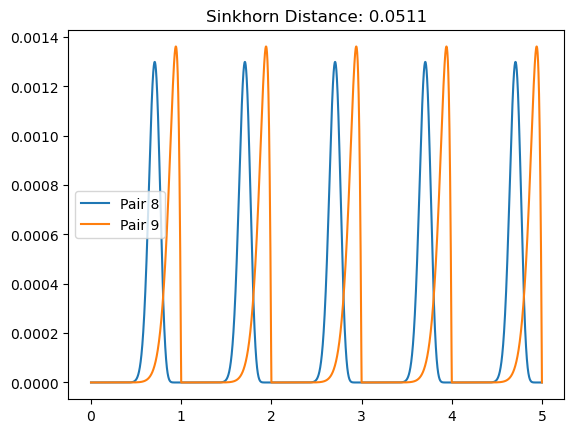

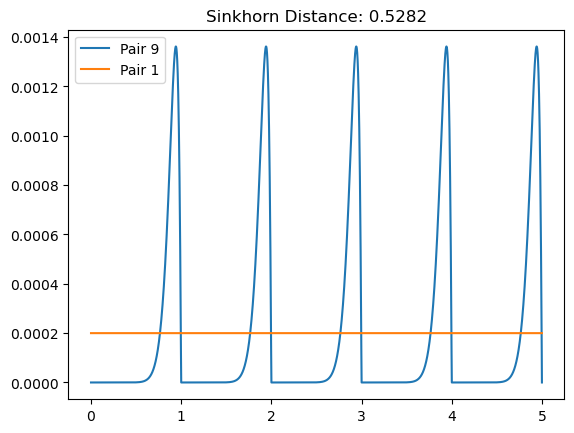

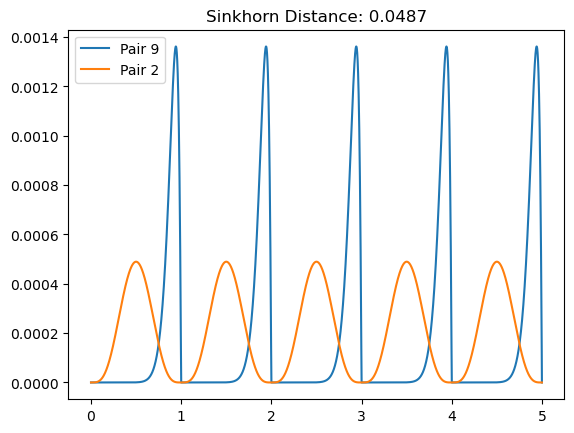

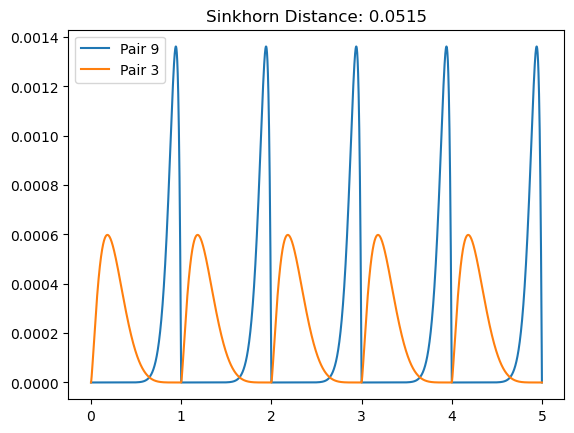

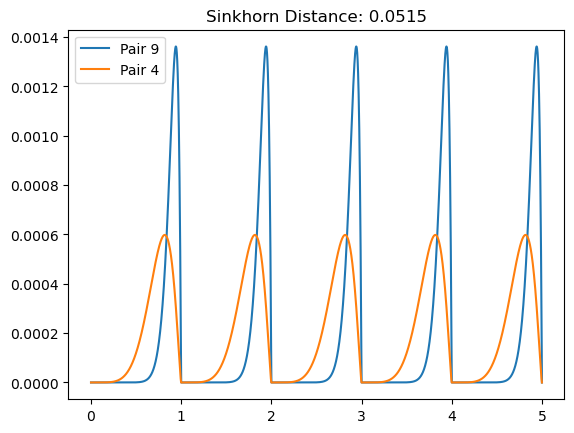

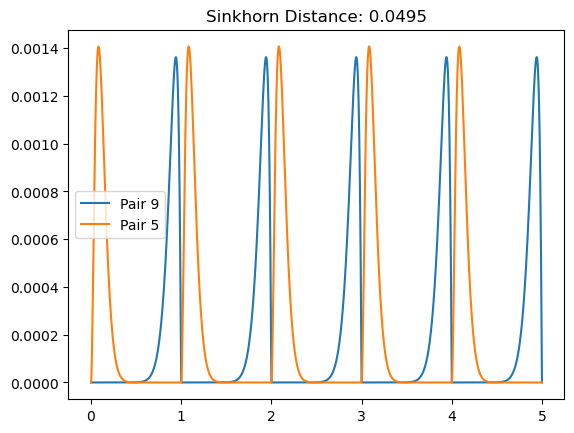

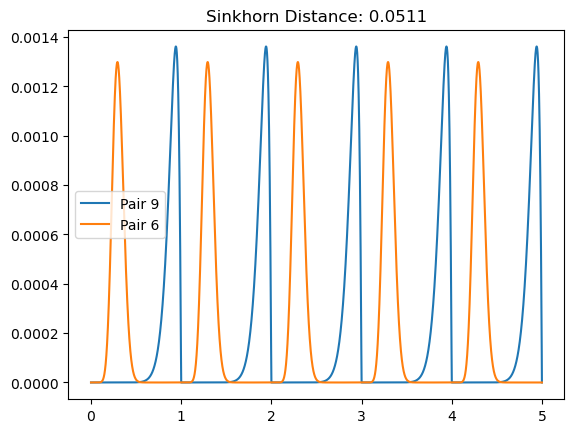

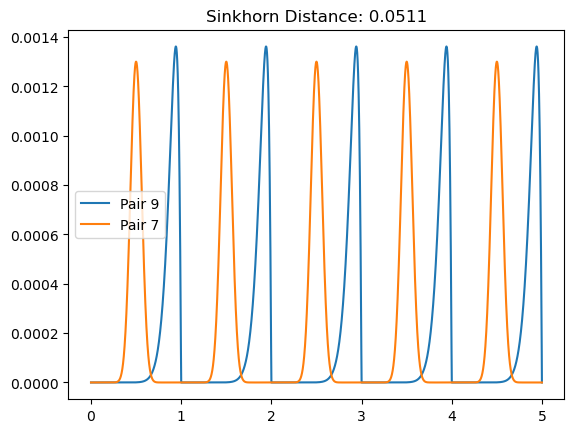

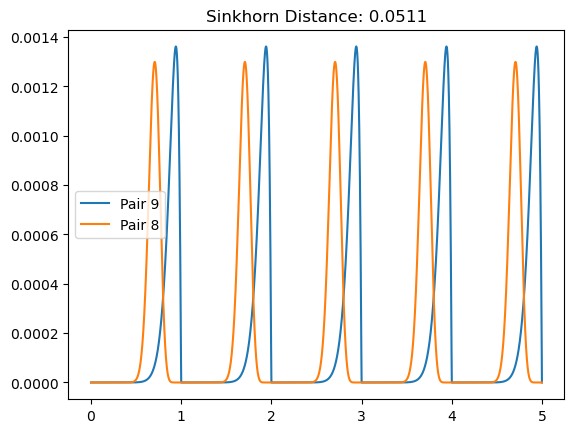

In [51]:
# make a dist matrix for all of our templates
# Define the x values for the PDF plot
x = np.linspace(0, 1, 1000)
x_tile = np.linspace(0, 5, 5000)

reg = 0.5
regm = 0.5
sink2_dist_mat = np.zeros((len(beta_parameters), len(beta_parameters)))
# Initialize an empty distance matrix for uot_d values
uot_distance_matrix = np.zeros((len(beta_parameters), len(beta_parameters)))

# Iterate through each pair of parameters in the array and compare with all others
for i, pair_i in enumerate(beta_parameters):
    pdf_i = np.tile(beta.pdf(x, pair_i[0], pair_i[1]), 5)
    pdf1_i = pdf_i / sum(pdf_i)

    for j, pair_j in enumerate(beta_parameters):
        pdf_j = np.tile(beta.pdf(x, pair_j[0], pair_j[1]), 5)
        pdf1_j = pdf_j / sum(pdf_j)

        # Compute unbalanced Sinkhorn distance between pdf1_i and pdf1_j
        #M = cost_matrix(pdf1_i, pdf1_j)
        #uot_d = math.sqrt(ot.unbalanced.sinkhorn_unbalanced2(pdf1_i, pdf1_j, M, reg, regm, verbose=True))
        #uot_distance_matrix[i, j] = uot_d
        
        
        M = ot.dist(pdf1_i.reshape(len(pdf1_i),1), pdf1_j.reshape(len(pdf1_j),1))
        M /= M.max()
        sink_dist = ot.sinkhorn2(pdf1_i,pdf1_j,M, reg)
        sink2_dist_mat[i,j] = sink_dist
        
        
        
        if i == j:
            continue

        # Plot the PDFs for visualization
        plt.plot(x_tile, pdf1_i, label=f"Pair {i + 1}")
        plt.plot(x_tile, pdf1_j, label=f"Pair {j + 1}")
        plt.title(f"Sinkhorn Distance: {sink_dist:.4f}")
        plt.legend()
        plt.show()

# Display the uot_d distance matrix
#print("Unbalanced Sinkhorn Distance Matrix:")
#print(uot_distance_matrix)

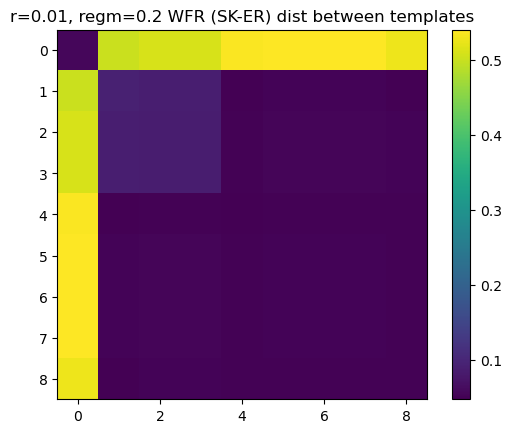

In [52]:
# Plot the distance matrix with colors
plt.imshow(sink2_dist_mat, cmap='viridis', interpolation='nearest')
plt.title('r=0.01, regm=0.2 WFR (SK-ER) dist between templates')
# Display colorbar
plt.colorbar()

In [16]:
np.version.version

'1.24.3'